# Random Forest classifier for Car Dataset

# 1. library Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Import Dataset

1. __Download Data__

In [5]:

import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/" 
dataset="car.data"
attributes="car.names"
# get data
response = requests.get(url+dataset,allow_redirects=True)
with open(dataset,'wb') as dataset_writer:
    dataset_writer.write(response.content)
raw_dataset = pd.read_csv(dataset,sep=";")
# get attributes
response = requests.get(url+attributes,allow_redirects=True)
with open(attributes,'wb') as attrset_writer:
    attrset_writer.write(response.content)


2. __look at data__

In [6]:
df = pd.read_csv(dataset)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


3.__find column names__

In [7]:
SEARCH_TEXT='7. Attribute Values:'
END_TEXT="8. Missing Attribute Values: none"
with open(attributes,'r') as names:
    content = names.read().splitlines()
    for item in content[content.index(SEARCH_TEXT):content.index(END_TEXT)]:
        print(item)

7. Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high



In [8]:
columns_list=['buying_price','maintainance_cost','no_of_doors','persons_capacity','luggage_boot','safety','class']
df.columns = columns_list

 4 __check data types__

In [9]:
df.dtypes

buying_price         object
maintainance_cost    object
no_of_doors          object
persons_capacity     object
luggage_boot         object
safety               object
class                object
dtype: object

# 3. Exploratory Data analysis

1. __convert categorical values in numericals__

In [10]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying_price','maintainance_cost','no_of_doors','persons_capacity','luggage_boot','safety','class'])
df = encoder.fit_transform(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [11]:
df.dtypes

buying_price         int64
maintainance_cost    int64
no_of_doors          int64
persons_capacity     int64
luggage_boot         int64
safety               int64
class                int64
dtype: object

2. __see statictical info of data__

In [12]:

df.describe()

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,2.500869,2.500869,2.500869,2.000579,2.000579,1.999421,1.417487
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.816615,0.747337
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000
75%,3.500000,3.500000,3.500000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [13]:
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   
show_unique_values(df)

Unique value for dataset attributes :

buying_price   [1 2 3 4] 

maintainance_cost   [1 2 3 4] 

no_of_doors   [1 2 3 4] 

persons_capacity   [1 2 3] 

luggage_boot   [1 2 3] 

safety   [1 2 3] 

class   [1 2 3 4] 



In [14]:
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")
show_missing_values(df)

buying_price
False    1727
Name: buying_price, dtype: int64

maintainance_cost
False    1727
Name: maintainance_cost, dtype: int64

no_of_doors
False    1727
Name: no_of_doors, dtype: int64

persons_capacity
False    1727
Name: persons_capacity, dtype: int64

luggage_boot
False    1727
Name: luggage_boot, dtype: int64

safety
False    1727
Name: safety, dtype: int64

class
False    1727
Name: class, dtype: int64



3. __Summary of variables__

    a. There are 7 variables in the dataset. All the variables are of categorical data type.

    b. These are given by buying, maint, doors, persons, lug_boot, safety and class.

    c. class is the target variable.

In [15]:
df.isnull().sum()

buying_price         0
maintainance_cost    0
no_of_doors          0
persons_capacity     0
luggage_boot         0
safety               0
class                0
dtype: int64

4. __fill blank values__

no blank value so no need to deal with null values

5.__drop duplicate values__

In [16]:
df = df.drop_duplicates(keep='first')
df

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1722,4,4,4,3,2,1,4
1723,4,4,4,3,2,2,3
1724,4,4,4,3,3,3,1
1725,4,4,4,3,3,1,4


6. __Plot using heat map on Initial Data__

<AxesSubplot:>

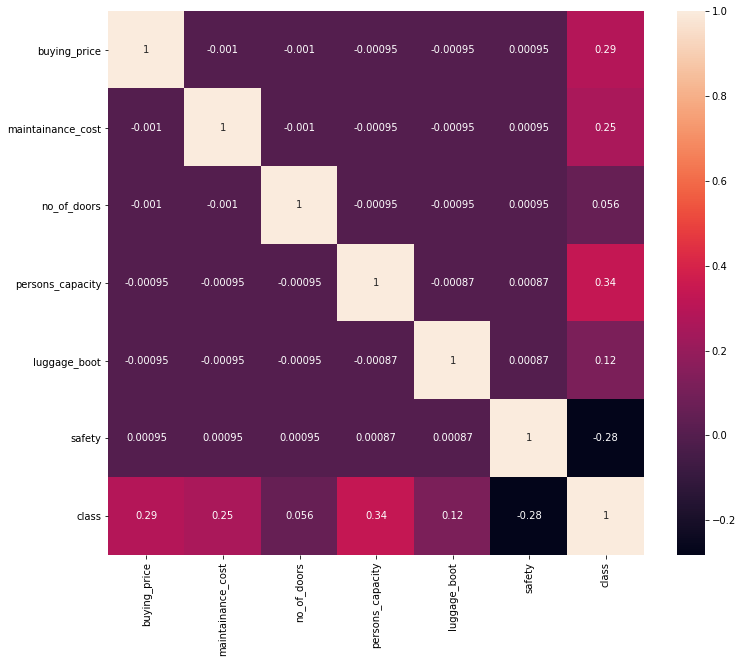

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

__Note:__ as none column is highly correlated then we are good to do next step else will had done removal of highly orrelated values 

# 4. Split data into separate training and test set

In [18]:
X = df[['buying_price', 'maintainance_cost', 'no_of_doors', 'luggage_boot',
       'safety']]
Y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# 5. Implement RandomForestClassifier Classifier model

In [20]:
from sklearn.ensemble import RandomForestClassifier 

In [21]:
randomforest = RandomForestClassifier(n_estimators=100,random_state=100)

In [22]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [23]:
predictions = randomforest.predict(X_test)

# 6. Calculate accuracy measures

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

[[310  66  10  13]
 [ 55  70   1   1]
 [ 11   1  12   2]
 [  8   0   0  10]]
              precision    recall  f1-score   support

           1       0.81      0.78      0.79       399
           2       0.51      0.55      0.53       127
           3       0.52      0.46      0.49        26
           4       0.38      0.56      0.45        18

    accuracy                           0.71       570
   macro avg       0.56      0.59      0.57       570
weighted avg       0.71      0.71      0.71       570

Accuracy :  70.52631578947368 



# 7. Feature Engineering

1.__see importances__

<AxesSubplot:>

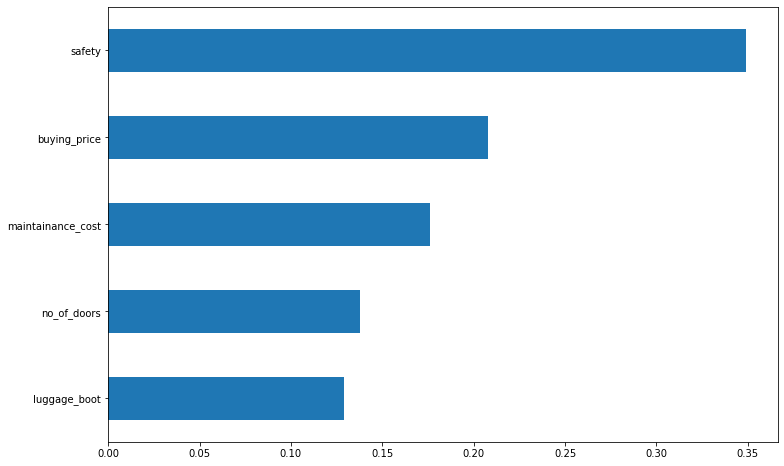

In [25]:
importances=pd.Series(randomforest.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(12,8))

2. __Univariate filters evaluate each feature independently with respect to the target variable.__
    Mutual Information (Information Gain)
    ,Gini index
    ,Gain Ratio
    ,Chi-Squared test
    Fisher Score

2.1 __Chi-Squared test Fisher Score__

In [26]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [27]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [28]:
show_top_univariate_filters(df, 'chi2', 5)

               Specs       Score
6              class  680.071078
3   persons_capacity   88.807133
0       buying_price   80.534340
5             safety   72.884311
1  maintainance_cost   59.978306


In [29]:
show_top_univariate_filters(df, 'f_classif', 5)

               Specs       Score
6              class         inf
3   persons_capacity  104.834882
5             safety   83.256528
0       buying_price   59.127704
1  maintainance_cost   42.908098


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


2.2 __correlation matrix__

In [30]:
df.corr()

,buying_price,maintainance_cost,no_of_doors,persons_capacity,luggage_boot,safety,class
buying_price,1.000000,-0.001043,-0.001043,-0.000952,-0.000952,0.000952,0.286273
maintainance_cost,-0.001043,1.000000,-0.001043,-0.000952,-0.000952,0.000952,0.254378
no_of_doors,-0.001043,-0.001043,1.000000,-0.000952,-0.000952,0.000952,0.056075
persons_capacity,-0.000952,-0.000952,-0.000952,1.000000,-0.000869,0.000869,0.336622
luggage_boot,-0.000952,-0.000952,-0.000952,-0.000869,1.000000,0.000869,0.121120
safety,0.000952,0.000952,0.000952,0.000869,0.000869,1.000000,-0.281560
class,0.286273,0.254378,0.056075,0.336622,0.121120,-0.281560,1.000000


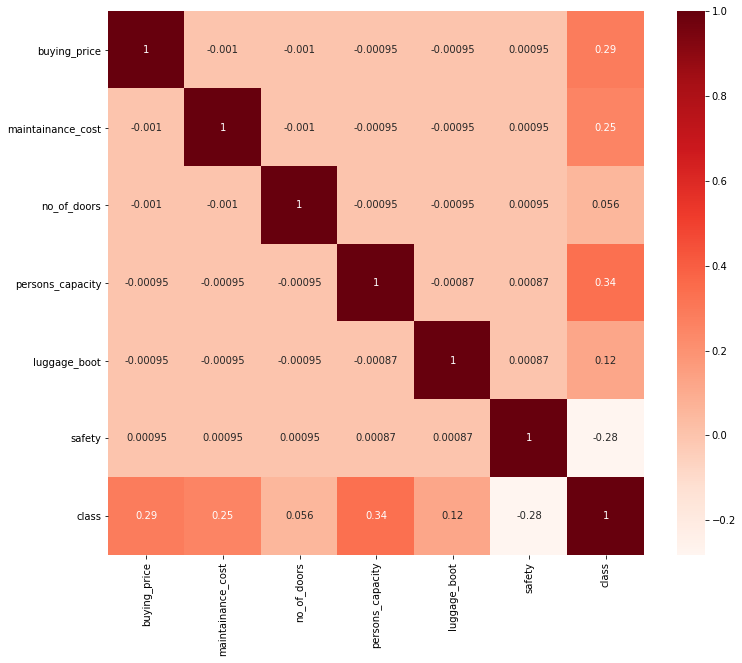

In [31]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

3. __wrapper method__

    Some common examples of wrapper methods are backward feature elimination, forward feature selection, recursive feature elimination, etc.

- Backward Elimination: The backward elimination starts with all the features and removes the least significant feature at each iteration which improves the performance of the model. This is repeated  until no improvement is observed on removal of features.
- Forward Selection: Forward selection is an iterative method which starts with having no feature in the model. In each iteration, a new feature is added to see if it improves the model. Its repeated till an addition of a new variable does not improve the performance of the model.
- Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def get_top_k_features_by_mlxtend(data, dt, top_k, forward=True, cv_cnt=0, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range
    
    #Prepare a model using the specified feature selection method 
    sfs_model = SFS(dt, 
                   k_features=top_k, 
                   forward=forward, 
                   floating=False, 
                   verbose=2,
                   scoring='accuracy',
                   cv=cv_cnt)
    
    #Lets fit the model and identify the features
    sfs_model = sfs_model.fit(X, y)
    
    #Show outcomes
    #print("Subsets : \n", sfs_model.subsets_ , "\n")
    if show_results:
        print("Score : " , sfs_model.k_score_, "\n")
        print("Top" , top_k , " Feature Names : " , sfs_model.k_feature_names_, "\n")
    
    return sfs_model
get_top_k_features_by_mlxtend(df, randomforest, 5, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Score :  0.9617834394904459 

Top 5  Feature Names :  ('buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety') 



[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s finished

[2021-01-03 16:07:00] Features: 5/5 -- score: 0.9617834394904459

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(random_state=100),
                          forward=False, k_features=5, scoring='accuracy',
                          verbose=2)

In [33]:
get_top_k_features_by_mlxtend(df, randomforest, 5, forward=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s finished

[2021-01-03 16:07:01] Features: 1/5 -- score: 0.7000579038795599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished

[2021-01-03 16:07:02] Features: 2/5 -- score: 0.7023740590619572[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s finished

[2021-01-03 16:07:03] Features: 3/5 -- score: 0.8193398957730168[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Score :  0.9617834394904459 

Top 5  Feature Names :  ('buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety') 



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s finished

[2021-01-03 16:07:04] Features: 5/5 -- score: 0.9617834394904459

SequentialFeatureSelector(cv=0,
                          estimator=RandomForestClassifier(random_state=100),
                          k_features=5, scoring='accuracy', verbose=2)

In [34]:
from sklearn.feature_selection import RFE
def get_top_k_features_by_rfe(data, dt, top_k, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list
get_top_k_features_by_rfe(df, randomforest, 5, show_results=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Num Features: 5

Selected Features : ['buying_price', 'maintainance_cost', 'persons_capacity', 'luggage_boot', 'safety']


['buying_price',
 'maintainance_cost',
 'persons_capacity',
 'luggage_boot',
 'safety']

In [35]:
# From abve feature list we can see the 'no_of_doors' is not impacting at all so we can remove this column .
del df['no_of_doors']

# 8. Apply PCA transformation


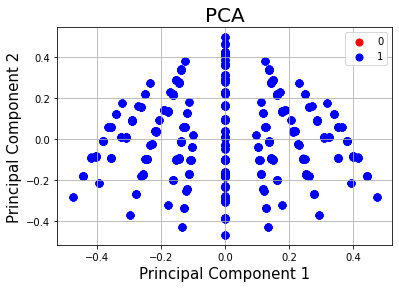

In [36]:
from sklearn.decomposition import PCA 

def apply_pca_and_get_final_df(df,target,show_graph=True):
    X = df.drop([target], axis=1)
    y = df[target]
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X.values)
    principalDf = pd.DataFrame(data=principalComponents
                               , columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, y], axis=1)
    if show_graph:
        fig, ax = plt.subplots()
        ax.set_xlabel('Principal Component 1', fontsize=15)
        ax.set_ylabel('Principal Component 2', fontsize=15)
        ax.set_title('PCA', fontsize=20)
        targets = [0, 1]
        colors = ['r', 'b']
        for target, color in zip(targets, colors):
            indicesToKeep = finalDf['class'] == target
            ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                       , finalDf.loc[indicesToKeep, 'principal component 2']
                       , c=color
                       , s=50)
        ax.legend(targets)
        ax.grid() 
    return finalDf

from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df.loc[:, df.columns != 'class'] = scaler.fit_transform(df.loc[:, df.columns != 'class'])

final_df = apply_pca_and_get_final_df(df,'class')

# 9. Again Apply RandomForest model on PCA components

In [37]:
finalDf = pd.DataFrame(df).fillna(df.mean())
X = finalDf.drop(['class'], axis=1)
Y = finalDf['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )
randomforest_after_pca = RandomForestClassifier(n_estimators=200,random_state=100)
randomforest_after_pca.fit(X_train,y_train)
predictions = randomforest_after_pca.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

[[344  15   0   0]
 [  5 106   1   3]
 [  1   0  18   2]
 [  0   0   3  21]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       359
           2       0.88      0.92      0.90       115
           3       0.82      0.86      0.84        21
           4       0.81      0.88      0.84        24

    accuracy                           0.94       519
   macro avg       0.87      0.90      0.89       519
weighted avg       0.94      0.94      0.94       519

Accuracy :  94.21965317919076 



# 10.  Calculate accuracy measures

In [38]:
print ("Accuracy : ", accuracy_score(y_test,predictions)*100, "\n") 

Accuracy :  94.21965317919076 

